In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

- CNN : 특징 추출
- DNN : 특징 분류

In [7]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target


print(data.images.shape)

(1797, 8, 8)


In [13]:
a= np.array([[1,2],[3,4],[5,6]])
print(a)
b=a.reshape(3,2,1) #뒤에 1 = 차원 하나 늘리기.
print(b.shape)
print(b)
print(b[:,:,0])

[[1 2]
 [3 4]
 [5 6]]
(3, 2, 1)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]
[[1 2]
 [3 4]
 [5 6]]


In [8]:
# 왜 차원 늘리는지 이해 안감.################################################ (분류레벨?)

X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))  # 3차원 ->4차원
y_data = to_categorical(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [28]:
# 파라미터 계산 해보기. 어떻게 저런 값이 나오는지.

model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), 
                 filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# (3X3) * 10 + 10 = 100           <-어떻게 계산되는지? 마지막 10의 의미?
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
# 50 * 10 + 10 = 510      바이어스? = b

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
activation_16 (Activation)   (None, 8, 8, 10)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                8050      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 8,660
Trainable params: 8,660
Non-trainable params: 0
____________________________________________________

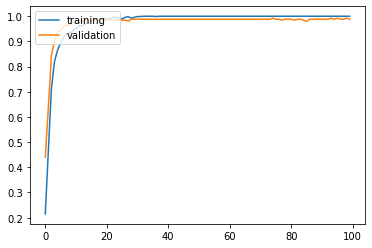

540/540 [==============================] - 0s 42us/step
Test accuracy:  0.9740740656852722


In [17]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

In [18]:
def deep_cnn():
    model = Sequential()
    
#     필터 2번에 한번 pooling
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
#     stride : 옆으로 몇칸씩 이동할것인지. 주로 1,1 사용
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Flatten())    
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [19]:
model = deep_cnn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_4 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_5 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_6 (Activation)    (None, 4, 4, 50)         

In [20]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 21.6 s


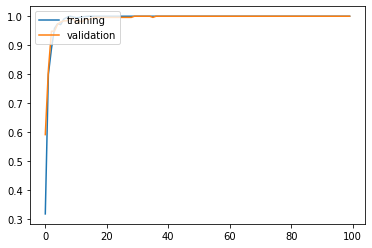

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [22]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])    # 오히려 결과가 떨어짐

540/540 [==============================] - 0s 112us/step
Test accuracy:  0.9814814925193787


## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [23]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
#     드랍아웃이나 앙상블은 아랫쪽에서 주로 사용. cnn에선 쓰던가 말던가인데 걍 쓰지마셈.
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [24]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_10 (Activation)   (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_11 (Activation)   (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 50)         

In [25]:
%%time      #셀의 계산시간 출력
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 39.5 s


In [26]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])       
#오히려 성능이 떨어짐. CNN은 DNN과 달리 깊게 설계하는게 힘듦.

540/540 [==============================] - 0s 146us/step
Test accuracy:  0.970370352268219
